In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [327]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [328]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [329]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [330]:
# drop "Other Names" because the data is same and just use country
df = df.drop('Other names', axis=1)

In [331]:
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [332]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Cases_per_million',
    'Tot\xa0Deaths/1M pop': 'Deaths_per_million'
})

# EDA

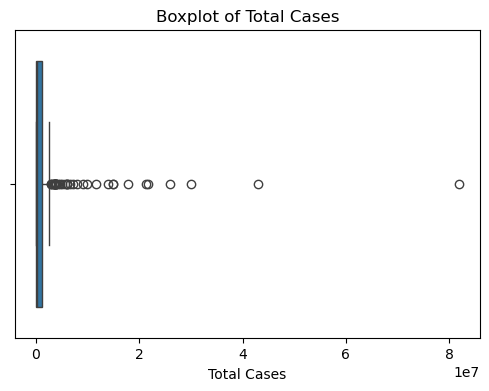

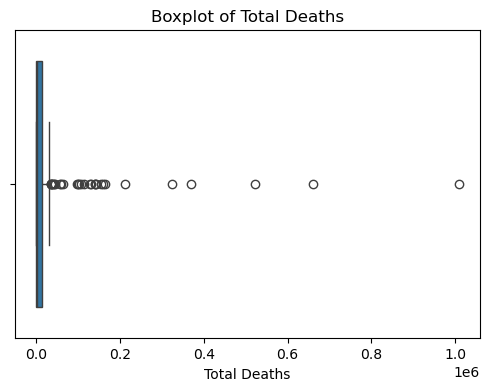

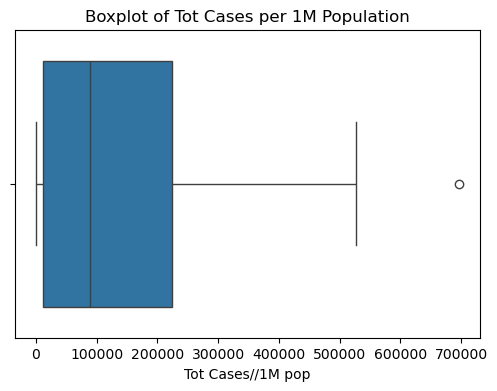

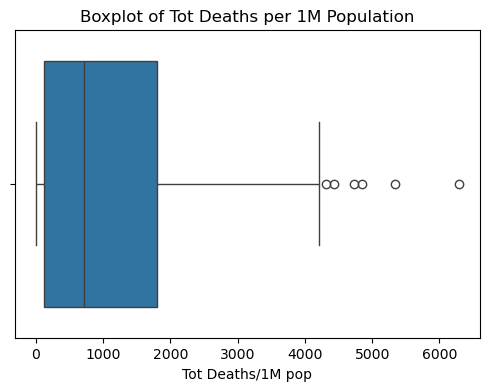

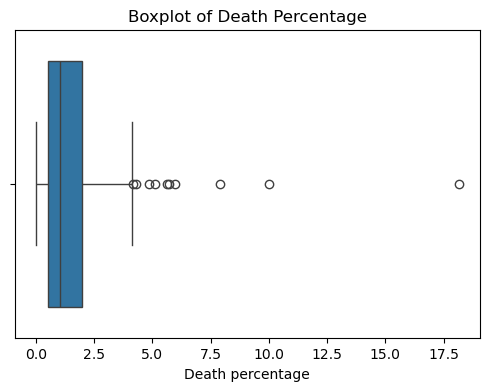

In [333]:
# Boxplot for Total Cases
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Total Cases'])
plt.title('Boxplot of Total Cases')
plt.xlabel('Total Cases')
plt.show()

# Boxplot for Total Deaths
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Total Deaths'])
plt.title('Boxplot of Total Deaths')
plt.xlabel('Total Deaths')
plt.show()

# Boxplot for Total Cases per 1M population
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Cases_per_million'])
plt.title('Boxplot of Tot Cases per 1M Population')
plt.xlabel('Tot Cases//1M pop')
plt.show()

# Boxplot for Total Deaths per 1M population
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Deaths_per_million'])
plt.title('Boxplot of Tot Deaths per 1M Population')
plt.xlabel('Tot Deaths/1M pop')
plt.show()

# Boxplot for Death percentage
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Death percentage'])
plt.title('Boxplot of Death Percentage')
plt.xlabel('Death percentage')
plt.show()


There are several outliers in numerical columnns for example in death percentage 17.5%.

In [334]:
# df = df[df['Total Cases'] <= 1e7]
# df = df[df['Total Deaths'] <= 0.6e6]
# df = df[df['Cases_per_million'] <= 700000]
# df = df[df['Deaths_per_million'] <= 5000]
# df = df[df['Death ercentage'] <= 17.5]


In [335]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE", 
    color="Continent", # Color by Continent for better readability hover_name="Country",
    projection="natural earth",
      title="World Map of Countries by Continent"
)
fig.show()

The visualization shows the world map of countries by continent. We can see which country belongs to which continent by color.

## Encoding and Data Transformation

In [336]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

df_encoded = df.copy()
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Fit and transform the 'Country' column
df_encoded['Country'] = le.fit_transform(df_encoded['Country'])


# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Cases_per_million,Deaths_per_million,Death percentage
114,114,LBY,7034832,0.0,501738,6419,71322,912,1.279353
160,160,POL,37774045,2.0,5969621,115345,158035,3054,1.932200
179,179,SYC,99413,0.0,40421,164,406597,1650,0.405730
39,39,TCD,17250246,0.0,7308,191,424,11,2.613574
95,95,IRQ,41801625,1.0,2320260,25173,55506,602,1.084922


In [337]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    int32  
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    float64
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Cases_per_million        225 non-null    int64  
 7   Deaths_per_million       225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 15.1+ KB


In [338]:
df_categorical = df_encoded[['Continent', 'Country']].copy()
df_categorical.head()

,Continent,Country
0,1.0,0
1,2.0,1
2,0.0,2
3,2.0,3
4,0.0,4


In [339]:
print(df_encoded.columns.tolist())

['Country', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Cases_per_million', 'Deaths_per_million', 'Death percentage']


In [340]:
df_encoded = df_encoded.rename(columns={
    'Tot\xa0Cases//1M pop': 'Cases_per_million',
    'Tot\xa0Deaths/1M pop': 'Deaths_per_million'
})

In [341]:
sc = StandardScaler()

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df_encoded[['Population', 'Total Cases', 'Total Deaths', 'Cases_per_million' , 'Deaths_per_million', 'Death percentage']])

df_scaled = pd.DataFrame(df_scaled, columns=['Population', 'Total Cases', 'Total Deaths', 'Cases_per_million' , 'Deaths_per_million', 'Death percentage'])
df_scaled.head()

,Population,Total Cases,Total Deaths,Cases_per_million,Deaths_per_million,Death percentage
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [342]:
df_scaled2 = pd.concat([df_scaled, df_categorical], axis=1)
df_scaled2.head()

,Population,Total Cases,Total Deaths,Cases_per_million,Deaths_per_million,Death percentage,Continent,Country
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0,0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0,1
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0,2
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0,3
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0,4


## Modeling

We don't include country, code or continent in modeling because they are not real numeric features. 

### K-Means

In [343]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

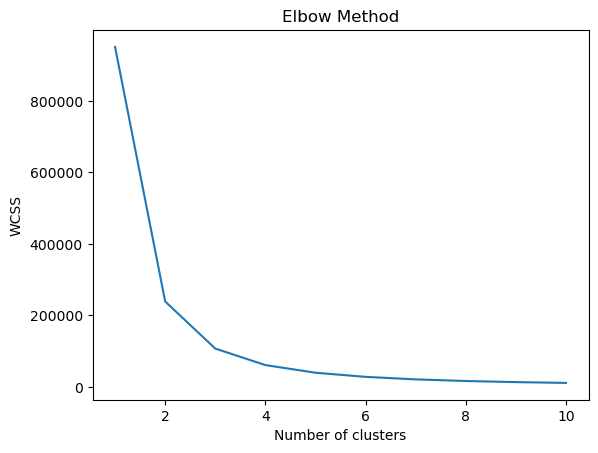

In [344]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled2)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [345]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters           WCSS
0                   1  951038.062222
1                   2  239131.125940
2                   3  107315.216901
3                   4   61171.411969
4                   5   39805.542394
5                   6   28234.851456
6                   7   21187.193372
7                   8   16661.294825
8                   9   13543.131744
9                  10   11281.582614


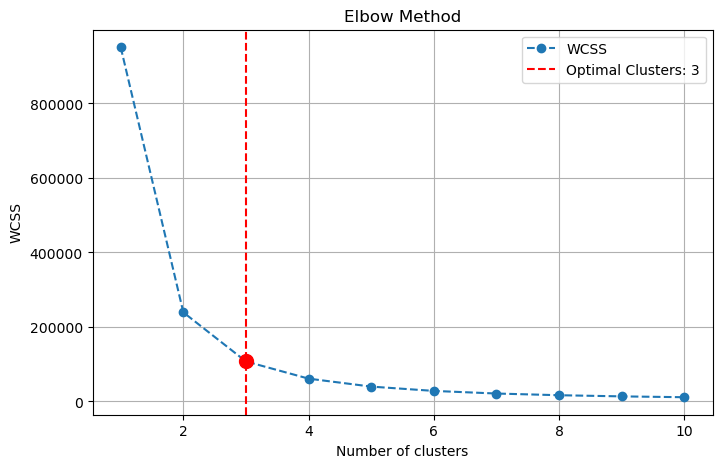

The optimal number of clusters is: 3


In [346]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [347]:
# Fit K-Means to the data with the optimal number of K cluster = 3
# yg penting isi n_clusters
# cecenya pake ZSCORE (sc_scaled)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled2)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters
sil_score = silhouette_score(df_scaled2, clusters)
print("Silhouette Score:", sil_score)

# Show the df
df.head()

Silhouette Score: 0.5523795064945627


c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Cases_per_million,Deaths_per_million,Death percentage,KMeans_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,3
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,3
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,3
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,3
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,3


### Hierarchical Agglomerative Clustering

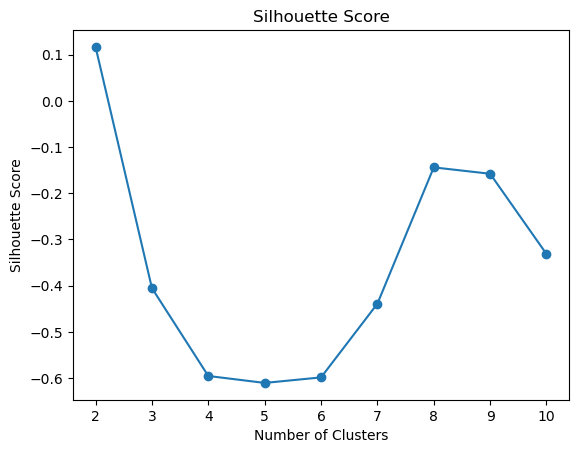

In [348]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled2)
    silhouette_avg = silhouette_score(df_scaled2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


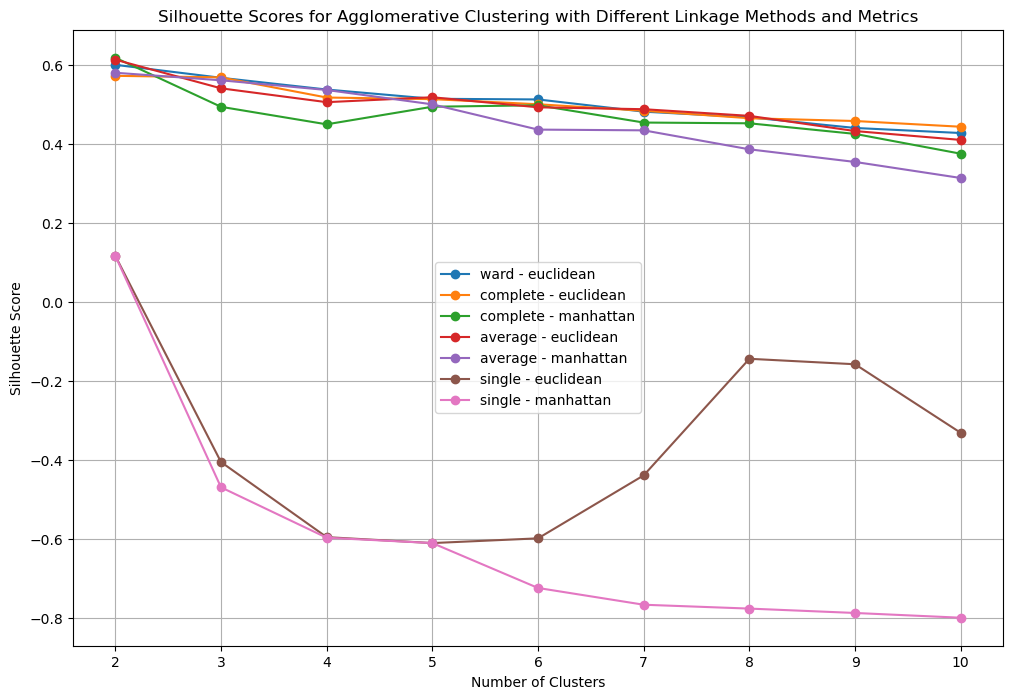

Best Silhouette Score: 0.6183463736868869
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [349]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled2)
            silhouette_avg = silhouette_score(df_scaled2, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [350]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled2)

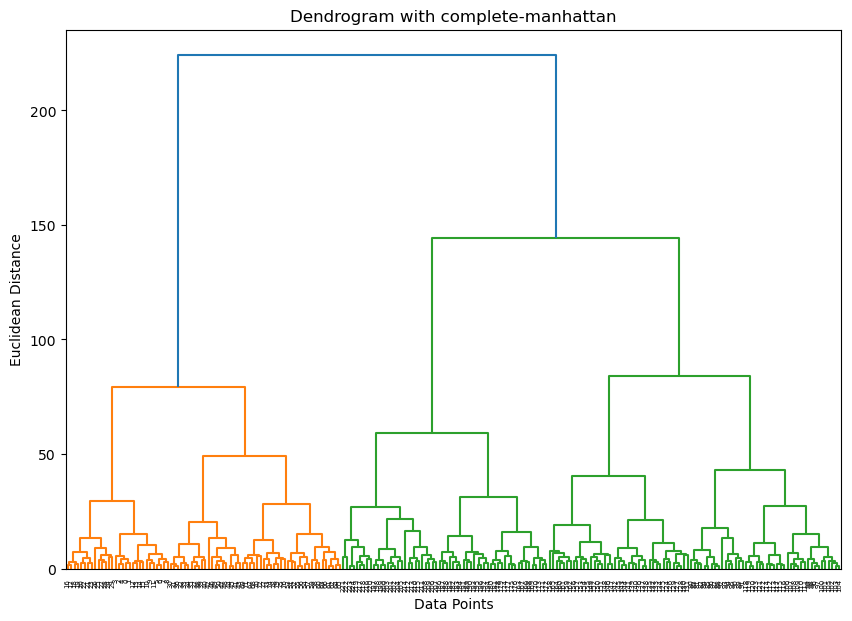

In [351]:
# Average Distance
linked = linkage(df_scaled2, method=best_linkage, metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [352]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Cases_per_million,Deaths_per_million,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,3,1
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,3,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,3,1
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,3,1
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,3,1


## Evaluation

### K-Means Result

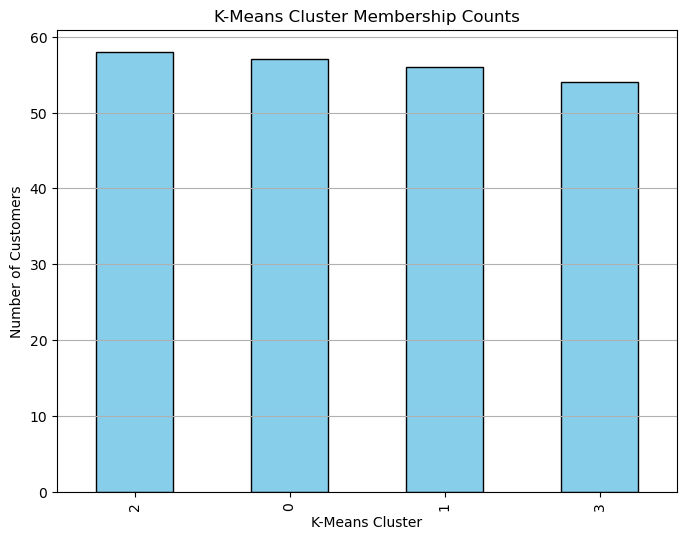

In [353]:
# brp anggota di cluster
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('K-Means Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [354]:
sil_score = silhouette_score(df_scaled2, clusters)
print("Silhouette Score K-Means:", sil_score)

Silhouette Score K-Means: 0.5523795064945627


In [355]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE", 
    color="KMeans_Cluster",
    projection="natural earth",
      title="World Map of Countries by K-Means Clustering"
)
fig.show()

### Agglomerative Result

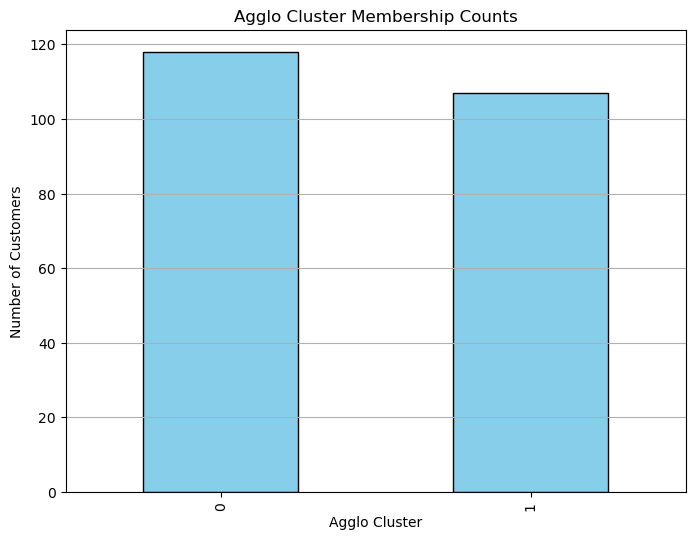

In [356]:
# brp anggota di cluster
cluster_counts = df['Agglo'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Agglo Cluster Membership Counts')
plt.xlabel('Agglo Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [357]:
ss = silhouette_score(df_scaled2, y_hc)
print("Silhouette Score Agglo: ", ss)

Silhouette Score Agglo:  0.6183463736868869


In [358]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE", 
    color="Agglo", 
    projection="natural earth",
      title="World Map of Countries by Agglomerative Clustering"
)
fig.show()

The agglomerative one perform better than the K-Means, with a silhoutte_score of 0.618. Because K-Means assumes clusters are round and similar in size, so it struggles with these differences, while agglomerative clustering groups similar countries more naturally, producing tighter and better-separated clusters.

In [363]:
import pandas as pd
from sklearn.metrics import silhouette_score

# Assuming your dataframe is called df
# And K-Means cluster labels are in 'KMeans_Cluster'

# Group by 'KMeans_Cluster' and calculate mean, min, max for numeric columns
cluster_summary_kmeans = df.groupby('KMeans_Cluster').agg({
    'Population': ['mean', 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Cases_per_million': ['mean', 'min', 'max'],
    'Deaths_per_million': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

# Rename the index for clarity
cluster_summary_kmeans = cluster_summary_kmeans.rename_axis('KMeans_Cluster')

# Show summary
cluster_summary_kmeans
# Optional: silhouette score if you have scaled numeric data and cluster labels
# ss_kmeans = silhouette_score(df_scaled2, df['KMeans_Cluster'])
# print("Silhouette Score K-Means: ", ss_kmeans)


Population                      Total Cases                  \
                        mean    min         max          mean   min       max   
KMeans_Cluster                                                                  
0               2.367906e+07   1645   228397520  1.257768e+06     1  17896866   
1               4.829260e+07   3657  1403754381  2.762578e+06   123  43029044   
2               2.395513e+07    805   334400597  3.169957e+06     2  81839052   
3               4.533301e+07  15237  1439323776  1.505948e+06  2118  29999816   

                Total Deaths              Cases_per_million                \
                        mean min      max              mean   min     max   
KMeans_Cluster                                                              
0               24955.070175   0   369708     131285.000000     9  459775   
1               28345.964286   0   521388     150515.410714  2623  696044   
2               31874.620690   0  1008222     120029.568966    16  468344   
3               24394.222222   0   660269     146828.907407   108  516565   

               Deaths_per_million           Death percentage                  
                             mean min   max             mean  min        max  
KMeans_Cluster                                                                
0                     1198.754386   0  6286         1.435609  0.0   5.983499  
1                     1003.000000   0  4732         1.230433  0.0   4.832523  
2                      922.000000   0  3553         1.789343  0.0  18.151787  
3                     1273.851852   0  5333         1.303931  0.0   4.313743

Managerial Implications Based on K-Means Clusters

Cluster 0 = Small Population / Moderate Case Countries

Profile:

Average population around 23 million.

Total cases and deaths are moderate compared to larger countries.

Death percentage is low (~1.4%).

Implications:

Focus health resources efficiently, targeting countries with moderate outbreaks.

Use public awareness campaigns and vaccination drives tailored for mid-sized populations.

Monitor trends closely to prevent future surges.

Cluster 1 = Large Population / High Absolute Cases Countries

Profile:

Very large populations (average ~48 million, up to 1.4 billion).

Total cases are high in absolute numbers, but per-million metrics are moderate.

Death percentage is low (~1.23%), indicating relatively controlled outcomes.

Implications:

Prioritize population-scale interventions: mass vaccination, testing, and preventive measures.

Focus on urban centers and densely populated areas.

Data-driven monitoring to quickly identify emerging outbreaks.

Cluster 2 = Small Population / High Per-Million Cases Countries

Profile:

Smaller populations (~24 million average).

Very high cases per million and deaths per million, indicating outbreaks are severe relative to population.

Death percentage is higher (~1.79%), showing vulnerability.

Implications:

Targeted health interventions and emergency resources are critical.

Communication campaigns should emphasize preventive behavior and early treatment.

Consider strict containment measures to avoid overwhelming local healthcare systems.

Cluster 3 = Large Population / Moderate Per-Million Cases Countries

Profile:

Large populations (~45 million average).

Total cases high in absolute terms but moderate when normalized per million (~1.5 million cases per million).

Death percentage around 1.3%.

Implications:

Mass public health campaigns with focus on testing and vaccination.

Emphasize preventive behaviors in high-density regions.

Suitable for long-term health monitoring and resource allocation planning.

In [360]:
import pandas as pd
from sklearn.metrics import silhouette_score

# Assuming your dataframe is called df
# And y_hc contains the hierarchical cluster labels (already assigned to 'Agglo')
# If not yet assigned, you can assign it like this:
# df['Agglo'] = y_hc

# Group by 'Agglo' and calculate mean, min, max for numeric columns
cluster_summary = df.groupby('Agglo').agg({
    'Population': ['mean', 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Cases_per_million': ['mean', 'min', 'max'],
    'Deaths_per_million': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('Agglo_Cluster')

# Show summary
cluster_summary

# Optional: silhouette score if you have scaled numeric data and cluster labels
# ss = silhouette_score(df_scaled2, y_hc)
# print("Silhouette Score Agglo: ", ss)


Population                     Total Cases                 \
                       mean   min         max          mean  min       max   
Agglo_Cluster                                                                
0              2.336998e+07   805   334400597  2.174274e+06    1  81839052   
1              4.797957e+07  3657  1439323776  2.196369e+06  123  43029044   

               Total Deaths              Cases_per_million               \
                       mean min      max              mean  min     max   
Agglo_Cluster                                                             
0              27774.500000   0  1008222     124094.872881    9  468344   
1              27088.205607   0   660269     151022.327103  108  696044   

              Deaths_per_million           Death percentage                  
                            mean min   max             mean  min        max  
Agglo_Cluster                                                                
0                    1041.737288   0  6286         1.592165  0.0  18.151787  
1                    1157.345794   0  5333         1.280865  0.0   4.832523

Managerial Implications Based on the Two Agglomerative Clusters

Cluster 0 = Smaller Population / High Case Burden Countries

Profile:

Population smaller on average (~23 million), but some countries with extremely high total cases and deaths.

Total cases range widely (800–334 million), indicating some countries are hotspots.

Death percentage is moderately high (~1.6% average), but some countries are extremely affected (up to 18%).

Implications:

Focus international aid or health resources on countries with high case and death numbers despite small populations.

Emphasize vaccination campaigns and healthcare infrastructure strengthening.

Communication should target both government and local communities to mitigate future outbreaks.

Prepare emergency response strategies in countries with disproportionate case numbers relative to population.

Cluster 1 = Large Population / Moderate Case Burden Countries

Profile:

Countries with very large populations (~48 million average, up to 1.4 billion).

Total cases are higher on absolute numbers but moderate when adjusted per million (~2.2 million average cases).

Death percentages lower (~1.28% average), indicating better relative outcomes despite larger populations.

Implications:

Health campaigns should focus on population-scale interventions — mass vaccination, testing, and awareness.

Policies should prioritize urban centers and densely populated regions.

Data monitoring and predictive modeling are essential to detect outbreaks early.

Communications should highlight preventive behaviors and health system readiness.

## Government Policy Recommendation

K-Means Clusters – Policy Recommendations

Cluster 0 – Small Population / Moderate Case Countries
Observation: Low total cases and deaths relative to population.
Recommendation: Governments should maintain testing and vaccination campaigns, monitor case trends, and prepare for potential surges to prevent outbreaks.

Cluster 1 – Large Population / High Absolute Cases Countries
Observation: High total cases due to large populations, but deaths per million are relatively low.
Recommendation: Focus on mass public health interventions such as widespread vaccination, mask mandates in crowded areas, and targeted urban health policies.

Cluster 2 – Small Population / High Per-Million Cases Countries
Observation: High cases and deaths per million; outbreak intensity is severe relative to population.
Recommendation: Emergency measures needed, including increased hospital capacity, stricter containment, intensive testing, and community awareness programs.

Cluster 3 – Large Population / Moderate Per-Million Cases Countries
Observation: Large populations with moderate cases per million and moderate death rates.
Recommendation: Preventive strategies like regular testing, vaccination promotion, and public health monitoring to avoid escalation in densely populated regions.

Agglomerative Clusters – Policy Recommendations

Cluster 0 – Smaller Population / High Case Burden Countries
Observation: Small populations but extremely high total cases and deaths.
Recommendation: Governments must allocate emergency resources, improve hospital readiness, and implement localized containment measures.

Cluster 1 – Large Population / Moderate Case Burden Countries
Observation: Large populations with moderate deaths per million and total cases.
Recommendation: Governments should focus on population-scale prevention such as mass vaccination, public awareness campaigns, and rapid outbreak detection systems.